In [250]:
#Comparing the stocks of car companies using historical data on the 
#basis of Opening Prices, Adjusted Closing Prices and Market Capitalization

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import datetime 

import seaborn as sns 

from pandas_datareader import DataReader

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [262]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [263]:
#Reading in stocks from Tesla (ticker symbol: TSLA), Ford (ticker symbol: F) and 
#General Motors (ticker symbol: G) from Yahoo Finance

#Defining stocks as a global variable allows it to be called by name later in the project

comp_list = ['TSLA', 'F', 'GM']

for stock in comp_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Text(0, 0.5, 'Opening Stock Price ($)')

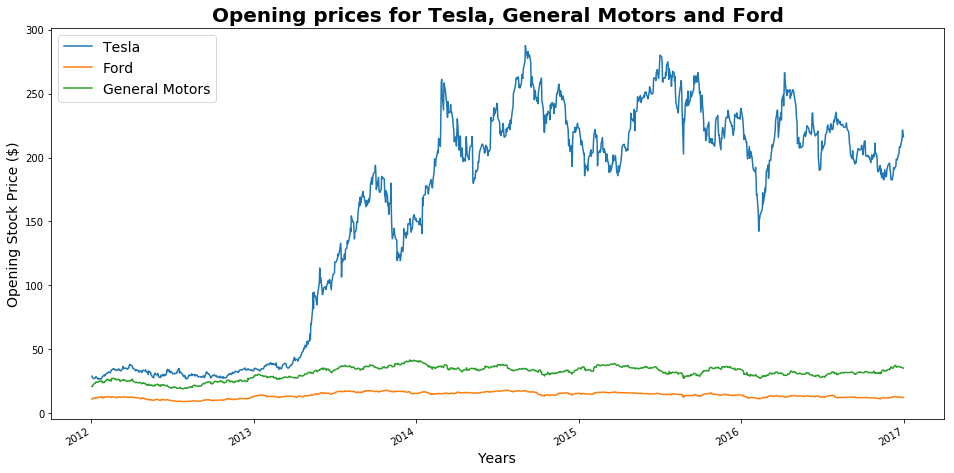

In [264]:
#Plotting the opening prices for the stocks being investigated over time

TSLA.Open.plot(label = 'Tesla')
F.Open.plot(label = 'Ford')
GM.Open.plot(label = 'General Motors')
plt.legend(fontsize = 14)
plt.title("Opening prices for Tesla, General Motors and Ford", weight = 'bold', fontsize = 20)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Opening Stock Price ($)", fontsize = 14)

Text(0, 0.5, 'Volume Traded')

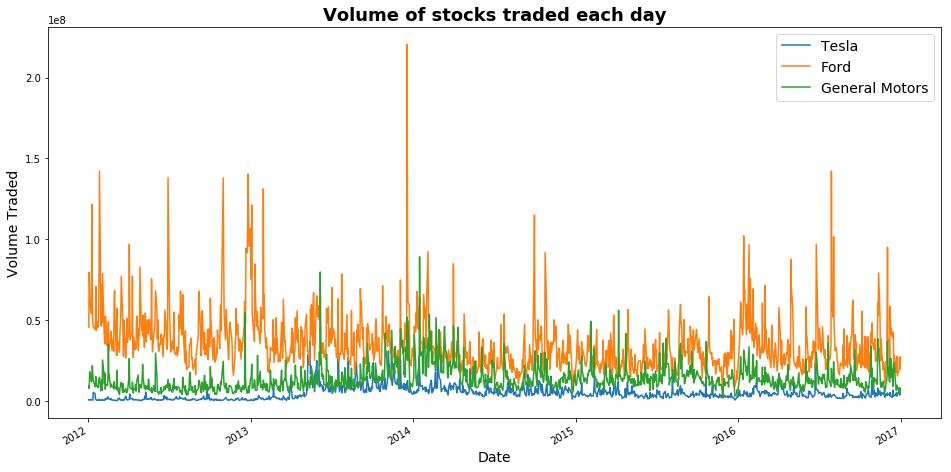

In [265]:
#Plotting the volume of stocks traded per day for the stocks being 
#investigated over time

TSLA.Volume.plot(label = 'Tesla')
F.Volume.plot(label = 'Ford')
GM.Volume.plot(label = 'General Motors')
plt.legend(fontsize = 14)
plt.title("Volume of stocks traded each day", weight = 'bold', fontsize = 18)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Volume Traded", fontsize = 14)

In [266]:
#Ford has a spike in volume of stocks traded between 2013 and 2014. 
#Let's investigate that further. 

F[F.Volume == F.Volume.max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.0,15.17,15.99,15.65,220363000.0,12.262237


In [267]:
# What happened:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

#Ford shares fell sharply after the company warned the cost of its aggressive push to 
#launch new products would cut into profits next year
#There was a lot of buying of Ford stocks 

In [268]:
#Calculating the market capitalization of each to find the most valuable company

TSLA['mcap'] = TSLA.Volume * TSLA.Open
F['mcap'] = F.Volume * F.Open
GM['mcap'] = GM.Volume * GM.Open

Text(0, 0.5, 'Market Capitalization ($)')

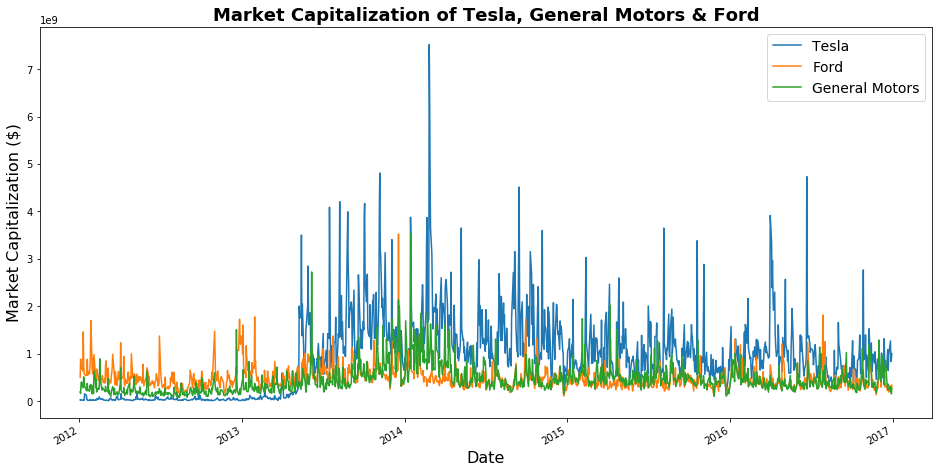

In [269]:
TSLA.mcap.plot(label = 'Tesla')
F.mcap.plot(label = 'Ford')
GM.mcap.plot(label = 'General Motors')
plt.legend(fontsize = 14)
plt.title("Market Capitalization of Tesla, General Motors & Ford", weight = 'bold', fontsize = 18)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Market Capitalization ($)", fontsize = 16)

In [270]:
#Tesla has a spike in market capitalization between 2014 and 2015. 
#Let's investigate that further: 

#Finding the location of the maximum Market Capitalization

TSLA.mcap.argmax()

/Users/mohammadananjaved/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


Timestamp('2014-02-25 00:00:00')

In [271]:
#What happened on February 25th, 2014: 

# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

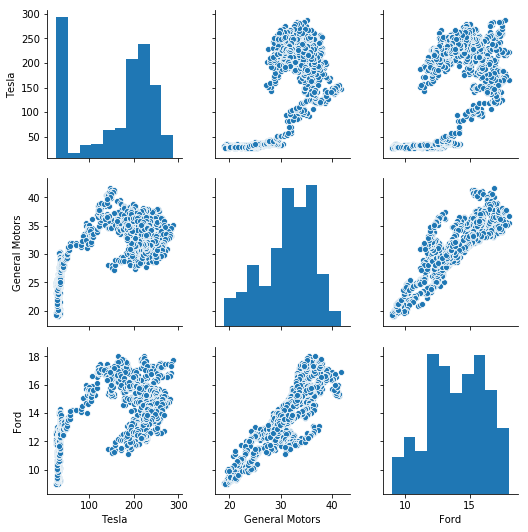

In [272]:
#Let's investigate if there is a relationship between these stocks as these 
#stocks are all in the car industry.
#Concatenating the opening prices of Tesla, GM & Ford into one dataframe 

open_stock = pd.concat([TSLA.Open, GM.Open, F.Open], axis = 1)
open_stock.columns = ['Tesla', 'General Motors', 'Ford']

sns.pairplot(open_stock)

In [273]:
#Calculating the Daily Percentage Change in Closing Price for each company:

Closing_Returns = DataReader(['TSLA', 'F', 'GM'], 'yahoo', start, end)['Close'].pct_change()
Closing_Returns.columns = ['Ford', 'General Motors', 'Tesla']

Text(0.5, 1.0, 'Assessing the Volatility of Ford, General Motors & Tesla')

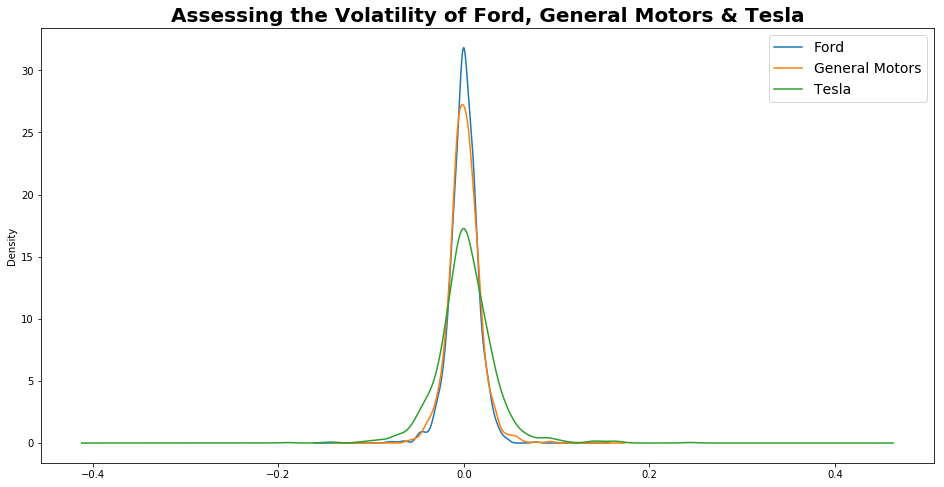

In [274]:
#Assessing the Volatility of the Closing Returns of the stocks

Closing_Returns.plot(kind = 'kde')
plt.legend(fontsize = 14)
plt.title("Assessing the Volatility of Ford, General Motors & Tesla", fontsize = 20, weight = 'bold')

No handles with labels found to put in legend.


Text(0, 0.5, 'Returns')

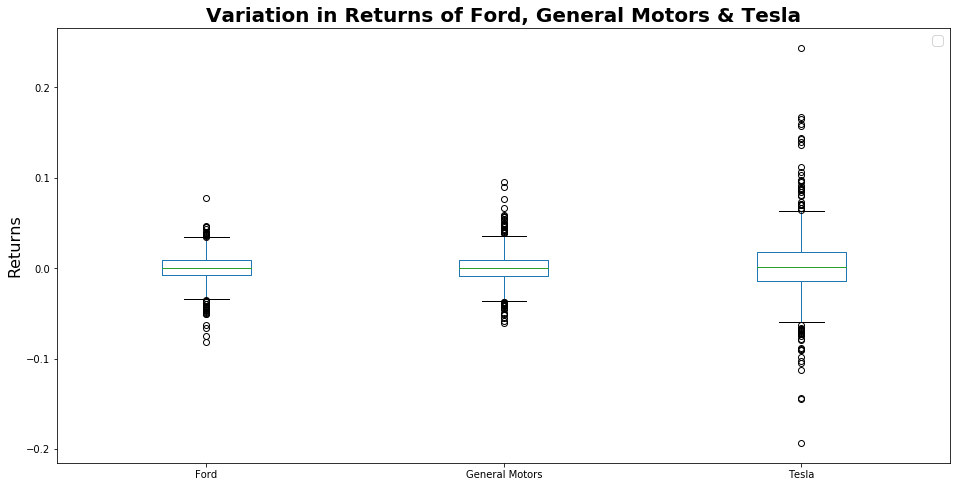

In [275]:
Closing_Returns.plot(kind = 'box')
plt.legend(fontsize = 14)
plt.title("Variation in Returns of Ford, General Motors & Tesla", fontsize = 20, weight = 'bold')
plt.ylabel("Returns", fontsize = 16)

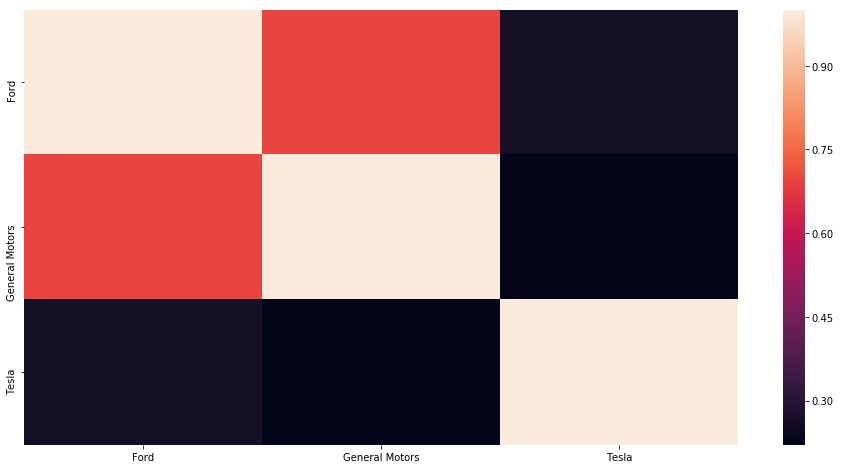

In [276]:
#Plotting a heatmap to show the correlation between the different stocks 

sns.heatmap(Closing_Returns.corr())

/Users/mohammadananjaved/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


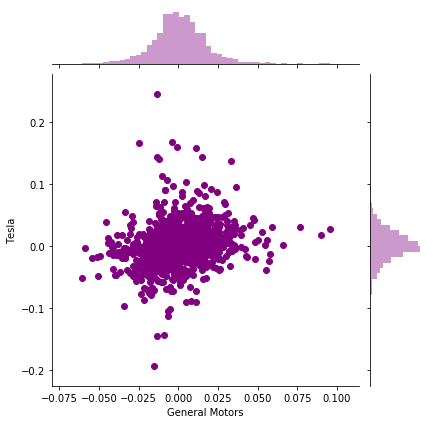

In [277]:
#Ford and GM have a high correlation in their closing returns. Let's investigate this further. 

sns.jointplot(Closing_Returns['General Motors'], Closing_Returns['Tesla'], color = 'purple')

Text(0.5, 1.0, 'Cumulative Daily Returns of Ford, Tesla & General Motors')

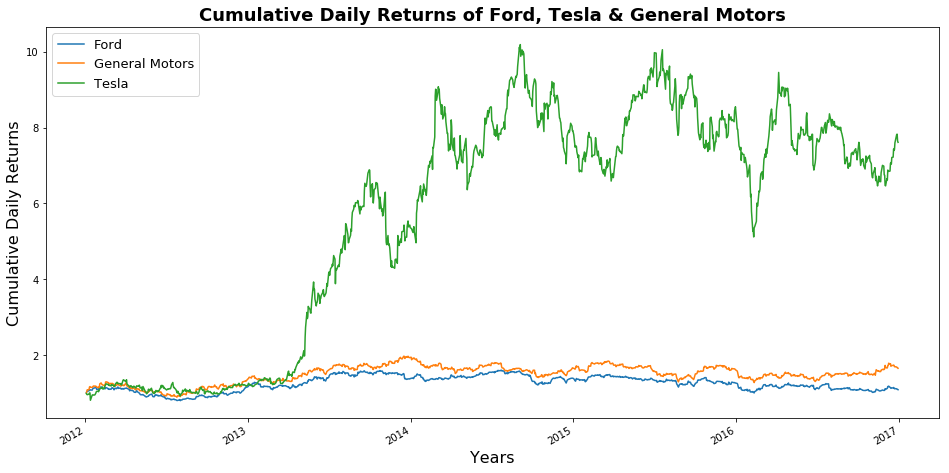

In [278]:
#Finding the company with the greatest cumulative return

def cum_ret(closing_returns):
    cum_ret = (1+closing_returns).cumprod()
    return cum_ret

Cumulative_Returns = cum_ret(Closing_Returns)

Cumulative_Returns.plot()
plt.ylabel("Cumulative Daily Returns", fontsize = 16)
plt.xlabel("Years", fontsize = 16)
plt.legend(fontsize = 13)
plt.title("Cumulative Daily Returns of Ford, Tesla & General Motors", weight = 'bold', fontsize = 18)